In [11]:
   import numpy as np
import matplotlib.pyplot as plt

from jampy.legacy.jam_sph_rms import jam_sph_rms

    

In [12]:

def jam_sph_rms_example():
    """
    Usage example for jam_sph_rms().
    It takes about 1s on a 2.5 GHz computer

    """

    # Realistic MGE galaxy surface brightness.
    # The surface brightness is in L_sun/pc^2 and the sigma in arcsec
    #
    surf_pc = np.array([6229., 3089., 5406., 8443., 4283., 1927., 708.8, 268.1, 96.83])
    sigma_arcsec = np.array([0.0374, 0.286, 0.969, 2.30, 4.95, 8.96, 17.3, 36.9, 128.])

    # Realistic observed stellar kinematics. It comes from AO observations
    # at R<2" and seeing-limited long slit observations at larger radii.
    # The galaxy has negligible rotation and we can use sigma as V_RMS
    #
    sig = np.array([395., 390., 387., 385., 380., 365., 350., 315., 310., 290., 260.])  # km/s
    erms = sig*0.02  # assume 2% errors in sigma
    rad = np.array([0.15, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 3, 5, 9, 15])  # arcsec

    # Realistic anisotropy profile from a Schwarzschild model.
    # The anisotropy varies smoothly between the following three regimes:
    # 1. beta = -1 for R < 1"
    # 2. beta = 0.3 for 1" < R < 30"
    # 3. beta = -0.2 for R > 30"
    #
    beta = np.empty_like(sigma_arcsec)
    beta[sigma_arcsec <= 1] = -1.0
    beta[(sigma_arcsec > 1) & (sigma_arcsec <= 30)] = 0.3
    beta[sigma_arcsec > 30] = -0.2

    # Compute V_RMS profiles and optimize M/L to best fit the data.
    # Assume self-consistency: same MGE for luminosity and potential.
    #
    pixSize = 0.1   # Spaxel size in arcsec
    sigmapsf = [0.1, 0.6]  # sigma of the PSF in arcsec from AO observations
    normpsf = [0.7, 0.3]
    mbh = 1.5e8     # Black hole mass in solar masses before multiplication by M/L
    distance = 20.  # Mpc

    rmsModel, ml, chi2 = jam_sph_rms(
        surf_pc, sigma_arcsec, surf_pc, sigma_arcsec, mbh, distance, rad,
        beta=beta, sigmapsf=sigmapsf, normpsf=normpsf, pixsize=pixSize,
        rms=sig, erms=erms, plot=True, tensor='los')



jam_sph_rms elapsed time sec: 0.88
beta[0]=-1.00; M/L=4.887; BH=7.33e+08; chi2/DOF=0.659
Total mass MGE: 7.14e+11


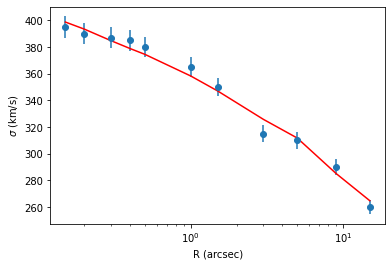

In [13]:

if __name__ == '__main__':

    plt.clf()
    jam_sph_rms_example()
    plt.pause(1)